In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset_poke = pd.read_csv('pokemon.csv')
dataset_comba = pd.read_csv('combats.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset_poke['Legendary'] = le.fit_transform(dataset_poke['Legendary'])

In [4]:

combat_data = dataset_comba.merge(
    dataset_poke,
    left_on='First_pokemon',
    right_on='#',
    suffixes=('', '_1')
)

combat_data = combat_data.merge(
    dataset_poke,
    left_on='Second_pokemon',
    right_on='#',
    suffixes=('_1', '_2')
)


colunas_desejadas = [
    'First_pokemon', 'Second_pokemon',
    'HP_1', 'Attack_1', 'Defense_1', 'Sp. Atk_1',  'Sp. Def_1', 'Speed_1', 'Type 1_1', 'Type 2_1',
    'HP_2', 'Attack_2', 'Defense_2', 'Sp. Atk_2', 'Sp. Def_2', 'Speed_2', 'Type 1_2', 'Type 2_2',
    'Winner'
]


colunas_existentes = [col for col in colunas_desejadas if col in combat_data.columns]

combat_data = combat_data[colunas_existentes]

In [5]:
display(combat_data)

,First_pokemon,Second_pokemon,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Type 1_1,Type 2_1,HP_2,Attack_2,Defense_2,Sp. Atk_2,Sp. Def_2,Speed_2,Type 1_2,Type 2_2,Winner
0,266,298,50,64,50,45,50,41,Rock,Ground,70,70,40,60,40,60,Grass,Dark,298
1,702,701,91,90,72,90,129,108,Grass,Fighting,91,129,90,72,90,108,Rock,Fighting,701
2,191,668,55,40,85,80,105,40,Fairy,Flying,75,75,75,125,95,40,Psychic,NaN,668
3,237,683,40,40,40,70,40,20,Fire,NaN,77,120,90,60,90,48,Dragon,NaN,683
4,151,231,70,60,125,115,70,55,Rock,Water,20,10,230,10,230,5,Bug,Rock,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,100,120,100,150,120,90,Dragon,Fire,30,40,70,70,25,60,Water,NaN,707
49996,589,664,60,85,40,30,45,68,Ground,NaN,35,55,40,45,40,60,Electric,NaN,589
49997,303,368,60,50,100,85,70,65,Water,Flying,73,115,60,60,60,90,Normal,NaN,368
49998,109,89,40,30,50,55,55,100,Electric,NaN,25,35,70,95,55,45,Electric,Steel,109


In [6]:
combat_data['Winner'] = (combat_data['Winner'] == combat_data['First_pokemon']).astype(int)

In [7]:
display(combat_data)

,First_pokemon,Second_pokemon,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Type 1_1,Type 2_1,HP_2,Attack_2,Defense_2,Sp. Atk_2,Sp. Def_2,Speed_2,Type 1_2,Type 2_2,Winner
0,266,298,50,64,50,45,50,41,Rock,Ground,70,70,40,60,40,60,Grass,Dark,0
1,702,701,91,90,72,90,129,108,Grass,Fighting,91,129,90,72,90,108,Rock,Fighting,0
2,191,668,55,40,85,80,105,40,Fairy,Flying,75,75,75,125,95,40,Psychic,NaN,0
3,237,683,40,40,40,70,40,20,Fire,NaN,77,120,90,60,90,48,Dragon,NaN,0
4,151,231,70,60,125,115,70,55,Rock,Water,20,10,230,10,230,5,Bug,Rock,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,100,120,100,150,120,90,Dragon,Fire,30,40,70,70,25,60,Water,NaN,1
49996,589,664,60,85,40,30,45,68,Ground,NaN,35,55,40,45,40,60,Electric,NaN,1
49997,303,368,60,50,100,85,70,65,Water,Flying,73,115,60,60,60,90,Normal,NaN,0
49998,109,89,40,30,50,55,55,100,Electric,NaN,25,35,70,95,55,45,Electric,Steel,1


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
combat_data[['HP_1', 'Attack_1', 'Defense_1', 'Sp. Atk_1', 'Sp. Def_1', 'Speed_1', 'HP_2', 'Attack_2', 'Defense_2', 'Sp. Atk_2', 'Sp. Def_2', 'Speed_2']] = sc.fit_transform(combat_data[['HP_1', 'Attack_1', 'Defense_1', 'Sp. Atk_1', 'Sp. Def_1', 'Speed_1', 'HP_2', 'Attack_2', 'Defense_2', 'Sp. Atk_2', 'Sp. Def_2', 'Speed_2']])

In [9]:
display(combat_data)

,First_pokemon,Second_pokemon,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Type 1_1,Type 2_1,HP_2,Attack_2,Defense_2,Sp. Atk_2,Sp. Def_2,Speed_2,Type 1_2,Type 2_2,Winner
0,266,298,-0.754321,-0.462551,-0.766510,-0.851845,-0.790834,-0.929200,Rock,Ground,0.035759,-0.278747,-1.081405,-0.387946,-1.150262,-0.284429,Grass,Dark,0
1,702,701,0.867711,0.332786,-0.071078,0.522399,2.039072,1.358426,Grass,Fighting,0.870091,1.541496,0.501976,-0.020347,0.645987,1.364588,Rock,Fighting,0
2,191,668,-0.556512,-1.196708,0.339860,0.217011,1.179354,-0.963344,Fairy,Flying,0.234410,-0.124489,0.026962,1.603215,0.825612,-0.971519,Psychic,NaN,0
3,237,683,-1.149938,-1.196708,-1.082615,-0.088376,-1.149050,-1.646217,Fire,NaN,0.313870,1.263832,0.501976,-0.387946,0.645987,-0.696683,Dragon,NaN,0
4,151,231,0.036914,-0.584910,1.604282,1.285868,-0.074402,-0.451189,Rock,Water,-1.950744,-2.129841,4.935444,-1.919608,5.675486,-2.173926,Bug,Rock,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,1.223766,1.250482,0.814018,2.354724,1.716678,0.743840,Dragon,Fire,-1.553443,-1.204294,-0.131376,-0.081614,-1.689137,-0.284429,Water,NaN,1
49996,589,664,-0.358703,0.179837,-1.082615,-1.309926,-0.969942,-0.007321,Ground,NaN,-1.354793,-0.741521,-1.081405,-0.847445,-1.150262,-0.284429,Electric,NaN,1
49997,303,368,-0.358703,-0.890809,0.814018,0.369705,-0.074402,-0.109752,Water,Flying,0.154950,1.109574,-0.448053,-0.387946,-0.431762,0.746207,Normal,NaN,0
49998,109,89,-1.149938,-1.502607,-0.766510,-0.546457,-0.611726,1.085276,Electric,NaN,-1.752093,-1.358552,-0.131376,0.684217,-0.611387,-0.799746,Electric,Steel,1


In [10]:
combat_data = combat_data.drop(columns=['First_pokemon', 'Second_pokemon'])
display(combat_data)

,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Type 1_1,Type 2_1,HP_2,Attack_2,Defense_2,Sp. Atk_2,Sp. Def_2,Speed_2,Type 1_2,Type 2_2,Winner
0,-0.754321,-0.462551,-0.766510,-0.851845,-0.790834,-0.929200,Rock,Ground,0.035759,-0.278747,-1.081405,-0.387946,-1.150262,-0.284429,Grass,Dark,0
1,0.867711,0.332786,-0.071078,0.522399,2.039072,1.358426,Grass,Fighting,0.870091,1.541496,0.501976,-0.020347,0.645987,1.364588,Rock,Fighting,0
2,-0.556512,-1.196708,0.339860,0.217011,1.179354,-0.963344,Fairy,Flying,0.234410,-0.124489,0.026962,1.603215,0.825612,-0.971519,Psychic,NaN,0
3,-1.149938,-1.196708,-1.082615,-0.088376,-1.149050,-1.646217,Fire,NaN,0.313870,1.263832,0.501976,-0.387946,0.645987,-0.696683,Dragon,NaN,0
4,0.036914,-0.584910,1.604282,1.285868,-0.074402,-0.451189,Rock,Water,-1.950744,-2.129841,4.935444,-1.919608,5.675486,-2.173926,Bug,Rock,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.223766,1.250482,0.814018,2.354724,1.716678,0.743840,Dragon,Fire,-1.553443,-1.204294,-0.131376,-0.081614,-1.689137,-0.284429,Water,NaN,1
49996,-0.358703,0.179837,-1.082615,-1.309926,-0.969942,-0.007321,Ground,NaN,-1.354793,-0.741521,-1.081405,-0.847445,-1.150262,-0.284429,Electric,NaN,1
49997,-0.358703,-0.890809,0.814018,0.369705,-0.074402,-0.109752,Water,Flying,0.154950,1.109574,-0.448053,-0.387946,-0.431762,0.746207,Normal,NaN,0
49998,-1.149938,-1.502607,-0.766510,-0.546457,-0.611726,1.085276,Electric,NaN,-1.752093,-1.358552,-0.131376,0.684217,-0.611387,-0.799746,Electric,Steel,1


In [11]:
display(combat_data.columns)

Index(['HP_1', 'Attack_1', 'Defense_1', 'Sp. Atk_1', 'Sp. Def_1', 'Speed_1',
       'Type 1_1', 'Type 2_1', 'HP_2', 'Attack_2', 'Defense_2', 'Sp. Atk_2',
       'Sp. Def_2', 'Speed_2', 'Type 1_2', 'Type 2_2', 'Winner'],
      dtype='object')

In [12]:
display(combat_data)

,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Type 1_1,Type 2_1,HP_2,Attack_2,Defense_2,Sp. Atk_2,Sp. Def_2,Speed_2,Type 1_2,Type 2_2,Winner
0,-0.754321,-0.462551,-0.766510,-0.851845,-0.790834,-0.929200,Rock,Ground,0.035759,-0.278747,-1.081405,-0.387946,-1.150262,-0.284429,Grass,Dark,0
1,0.867711,0.332786,-0.071078,0.522399,2.039072,1.358426,Grass,Fighting,0.870091,1.541496,0.501976,-0.020347,0.645987,1.364588,Rock,Fighting,0
2,-0.556512,-1.196708,0.339860,0.217011,1.179354,-0.963344,Fairy,Flying,0.234410,-0.124489,0.026962,1.603215,0.825612,-0.971519,Psychic,NaN,0
3,-1.149938,-1.196708,-1.082615,-0.088376,-1.149050,-1.646217,Fire,NaN,0.313870,1.263832,0.501976,-0.387946,0.645987,-0.696683,Dragon,NaN,0
4,0.036914,-0.584910,1.604282,1.285868,-0.074402,-0.451189,Rock,Water,-1.950744,-2.129841,4.935444,-1.919608,5.675486,-2.173926,Bug,Rock,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.223766,1.250482,0.814018,2.354724,1.716678,0.743840,Dragon,Fire,-1.553443,-1.204294,-0.131376,-0.081614,-1.689137,-0.284429,Water,NaN,1
49996,-0.358703,0.179837,-1.082615,-1.309926,-0.969942,-0.007321,Ground,NaN,-1.354793,-0.741521,-1.081405,-0.847445,-1.150262,-0.284429,Electric,NaN,1
49997,-0.358703,-0.890809,0.814018,0.369705,-0.074402,-0.109752,Water,Flying,0.154950,1.109574,-0.448053,-0.387946,-0.431762,0.746207,Normal,NaN,0
49998,-1.149938,-1.502607,-0.766510,-0.546457,-0.611726,1.085276,Electric,NaN,-1.752093,-1.358552,-0.131376,0.684217,-0.611387,-0.799746,Electric,Steel,1


In [13]:
x = combat_data.iloc[:, :-1].values
y = combat_data.iloc[:, -1].values

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


categorical_columns_indices = [6, 7, 14, 15]

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown = 'ignore'), categorical_columns_indices)
    ],
    remainder='passthrough'
)
x = ct.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [16]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,              # Usar apenas 80% dos dados por árvore
    colsample_bytree=0.8,       # Usar apenas 80% das features por árvore
    random_state=0
)
classifier = xgb.fit(x_train, y_train)

In [17]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6410  246]
 [ 200 5644]]


0.96432

In [19]:
# Verificação rápida
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(classifier, x, y, cv=5)
acuracia_cv = cv_scores.mean()

# Acurácias
acuracia_treino = classifier.score(x_train, y_train)
acuracia_teste = classifier.score(x_test, y_test)

print("=== VERIFICAÇÃO RÁPIDA ===")
print(f"Acurácia Treino: {acuracia_treino:.4f}")
print(f"Acurácia Teste:  {acuracia_teste:.4f}")
print(f"Acurácia CV:     {acuracia_cv:.4f}")
print(f"Diferença:       {acuracia_treino - acuracia_teste:.4f}")

if acuracia_treino - acuracia_teste > 0.05:
    print("OVERFITTING!")
elif acuracia_treino - acuracia_teste > 0.02:
    print(" Leve overfitting")
else:
    print("Generaliza bem!")

=== VERIFICAÇÃO RÁPIDA ===
Acurácia Treino: 0.9811
Acurácia Teste:  0.9643
Acurácia CV:     0.9669
Diferença:       0.0168
Generaliza bem!


In [20]:
# Função para buscar Pokémon pelo nome
def buscar_pokemon_por_nome(nome_pokemon):
    """Busca um Pokémon pelo nome no dataset"""
    pokemon_encontrado = dataset_poke[dataset_poke['Name'].str.lower() == nome_pokemon.lower()]

    if pokemon_encontrado.empty:
        print(f"❌ Pokémon '{nome_pokemon}' não encontrado!")
        print("💡 Dica: Verifique a grafia do nome ou use a lista de Pokémon disponíveis.")
        return None

    return pokemon_encontrado.iloc[0]

# Função para preparar dados da batalha
def preparar_dados_batalha(pokemon1, pokemon2):
    """Prepara os dados no formato correto para o modelo"""

    # Criar dicionário com os dados da batalha
    batalha_data = {
        'HP_1': pokemon1['HP'],
        'Attack_1': pokemon1['Attack'],
        'Defense_1': pokemon1['Defense'],
        'Sp. Atk_1': pokemon1['Sp. Atk'],
        'Sp. Def_1': pokemon1['Sp. Def'],
        'Speed_1': pokemon1['Speed'],
        'Type 1_1': pokemon1['Type 1'],
        'Type 2_1': pokemon1['Type 2'] if pd.notna(pokemon1['Type 2']) else '',
        'HP_2': pokemon2['HP'],
        'Attack_2': pokemon2['Attack'],
        'Defense_2': pokemon2['Defense'],
        'Sp. Atk_2': pokemon2['Sp. Atk'],
        'Sp. Def_2': pokemon2['Sp. Def'],
        'Speed_2': pokemon2['Speed'],
        'Type 1_2': pokemon2['Type 1'],
        'Type 2_2': pokemon2['Type 2'] if pd.notna(pokemon2['Type 2']) else ''
    }

    # Converter para DataFrame
    batalha_df = pd.DataFrame([batalha_data])

    # Aplicar scaling nos dados numéricos (usando o mesmo scaler do treino)
    colunas_numericas = ['HP_1', 'Attack_1', 'Defense_1', 'Sp. Atk_1', 'Sp. Def_1', 'Speed_1',
                        'HP_2', 'Attack_2', 'Defense_2', 'Sp. Atk_2', 'Sp. Def_2', 'Speed_2']

    batalha_df[colunas_numericas] = sc.transform(batalha_df[colunas_numericas])

    # Adicionar features de tipo

    return batalha_df

# Função para fazer a previsão
def prever_batalha():
    """Interface principal para prever batalhas"""
    print("🎮 SIMULADOR DE BATALHA POKÉMON 🎮")
    print("=" * 50)

    # Input dos Pokémon
    pokemon1_nome = input("\n🏹 Digite o nome do PRIMEIRO Pokémon: ").strip()
    pokemon2_nome = input("🛡️  Digite o nome do SEGUNDO Pokémon: ").strip()

    print(f"\n⚡ Preparando batalha: {pokemon1_nome} vs {pokemon2_nome}...")

    # Buscar dados dos Pokémon
    pokemon1 = buscar_pokemon_por_nome(pokemon1_nome)
    if pokemon1 is None:
        return

    pokemon2 = buscar_pokemon_por_nome(pokemon2_nome)
    if pokemon2 is None:
        return

    # Preparar dados para o modelo
    batalha_df = preparar_dados_batalha(pokemon1, pokemon2)

    # Aplicar o mesmo ColumnTransformer usado no treino
    X_batalha = ct.transform(batalha_df)

    # Fazer previsão
    probabilidades = classifier.predict_proba(X_batalha)[0]
    previsao = classifier.predict(X_batalha)[0]

    # Exibir resultados
    probabilidade_pokemon1 = probabilidades[1]  # Probabilidade do primeiro vencer
    probabilidade_pokemon2 = probabilidades[0]  # Probabilidade do segundo vencer

    print("\n" + "🎯" * 25)
    print("RESULTADO DA PREVISÃO:")
    print("🎯" * 25)
    print(f"🏹 {pokemon1_nome}: {probabilidade_pokemon1*100:.2f}% de chance")
    print(f"🛡️  {pokemon2_nome}: {probabilidade_pokemon2*100:.2f}% de chance")
    print("🎯" * 25)

    if previsao == 1:
        print(f"🏆 VENCEDOR PREVISTO: {pokemon1_nome}!")
        print(f"🎉 Probabilidade de vitória: {probabilidade_pokemon1*100:.2f}%")
    else:
        print(f"🏆 VENCEDOR PREVISTO: {pokemon2_nome}!")
        print(f"🎉 Probabilidade de vitória: {probabilidade_pokemon2*100:.2f}%")


    # Stats dos Pokémon (valores originais, não normalizados)
    print(f"\n📈 STATS COMPARADOS:")
    print(f"   {pokemon1_nome}: HP={pokemon1['HP']}, ATK={pokemon1['Attack']}, DEF={pokemon1['Defense']}, SPEED={pokemon1['Speed']}")
    print(f"   {pokemon2_nome}: HP={pokemon2['HP']}, ATK={pokemon2['Attack']}, DEF={pokemon2['Defense']}, SPEED={pokemon2['Speed']}")

# Função para listar Pokémon disponíveis
def listar_pokemon_disponiveis(quantidade=15):
    """Lista alguns Pokémon disponíveis"""
    print(f"\n📋 LISTA DE POKÉMON DISPONÍVEIS (amostra de {quantidade}):")
    print("-" * 40)
    pokemon_sample = dataset_poke[['Name', 'Type 1', 'Type 2']].sample(quantidade)
    for i, (_, pokemon) in enumerate(pokemon_sample.iterrows(), 1):
        tipo2 = f"/{pokemon['Type 2']}" if pd.notna(pokemon['Type 2']) else ""
        print(f"{i:2d}. {pokemon['Name']:20} {pokemon['Type 1']}{tipo2}")
    print("-" * 40)

# Executar o simulador
print("🔥 BEM-VINDO AO SIMULADOR DE BATALHAS POKÉMON! 🔥")
print("Baseado em Machine Learning com 96% de acurácia!")
print("\nComo usar:")
print("1. Digite os nomes exatos dos Pokémon")
print("2. Veja as probabilidades de vitória")
print("3. Analise as vantagens de tipo e stats")

listar_pokemon_disponiveis()

while True:
    prever_batalha()

    continuar = input("\n🔁 Deseja simular outra batalha? (s/n): ").strip().lower()
    if continuar != 's':
        print("\n👋 Obrigado por usar o Simulador de Batalhas Pokémon!")
        break
    print("\n" + "="*50)

🔥 BEM-VINDO AO SIMULADOR DE BATALHAS POKÉMON! 🔥
Baseado em Machine Learning com 96% de acurácia!

Como usar:
1. Digite os nomes exatos dos Pokémon
2. Veja as probabilidades de vitória
3. Analise as vantagens de tipo e stats

📋 LISTA DE POKÉMON DISPONÍVEIS (amostra de 15):
----------------------------------------
 1. Drowzee              Psychic
 2. Pachirisu            Electric
 3. Pelipper             Water/Flying
 4. Cradily              Rock/Grass
 5. Purugly              Normal
 6. Aegislash Blade Forme Steel/Ghost
 7. Dusknoir             Ghost
 8. Oddish               Grass/Poison
 9. Bergmite             Ice
10. Turtwig              Grass
11. Gulpin               Poison
12. Pidgeotto            Normal/Flying
13. Wash Rotom           Electric/Water
14. Poliwrath            Water/Fighting
15. Stoutland            Normal
----------------------------------------
🎮 SIMULADOR DE BATALHA POKÉMON 🎮

🏹 Digite o nome do PRIMEIRO Pokémon: oddish
🛡️  Digite o nome do SEGUNDO Pokémon: turtwi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(



⚡ Preparando batalha: oddish vs turtwig...

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
RESULTADO DA PREVISÃO:
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
🏹 oddish: 8.07% de chance
🛡️  turtwig: 91.93% de chance
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
🏆 VENCEDOR PREVISTO: turtwig!
🎉 Probabilidade de vitória: 91.93%

📈 STATS COMPARADOS:
   oddish: HP=45, ATK=50, DEF=55, SPEED=30
   turtwig: HP=55, ATK=68, DEF=64, SPEED=31

🔁 Deseja simular outra batalha? (s/n): n

👋 Obrigado por usar o Simulador de Batalhas Pokémon!


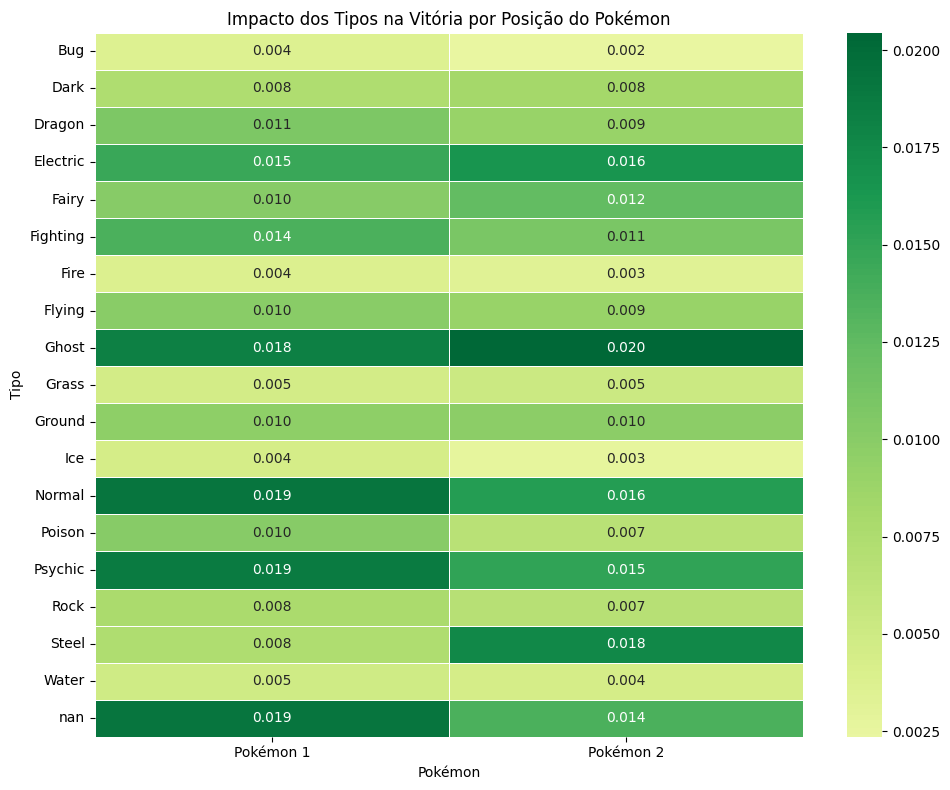

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Make sure matplotlib is imported

feature_importance = classifier.feature_importances_
feature_names = ct.get_feature_names_out()

# Filtrar apenas features de tipo Pokémon
type_features = []
type_importance = []

for name, imp in zip(feature_names, feature_importance):
    if 'encoder__' in name: # Only consider encoded features
        parts = name.replace('encoder__', '').split('_')
        if len(parts) >= 2:
            col_prefix = parts[0]
            type_name = parts[1]

            pokemon = ''
            if 'x6' in col_prefix or 'x7' in col_prefix:
                pokemon = 'Pokémon 1'
            elif 'x14' in col_prefix or 'x15' in col_prefix:
                pokemon = 'Pokémon 2'
            else:
                continue # Skip other encoded features

            type_features.append((pokemon, type_name))
            type_importance.append(imp)

# Criar DataFrame
df_tipos = pd.DataFrame({
    'Pokémon': [x[0] for x in type_features],
    'Tipo': [x[1] for x in type_features],
    'Importância': type_importance
})

# Aggregate importance for duplicate entries before pivoting
df_tipos_agg = df_tipos.groupby(['Tipo', 'Pokémon'])['Importância'].mean().reset_index()

# Pivot para heatmap
heatmap_data = df_tipos_agg.pivot(index='Tipo', columns='Pokémon', values='Importância')
heatmap_data = heatmap_data.fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', center=0,
            fmt='.3f', linewidths=0.5)
plt.title('Impacto dos Tipos na Vitória por Posição do Pokémon')
plt.tight_layout()
plt.show()

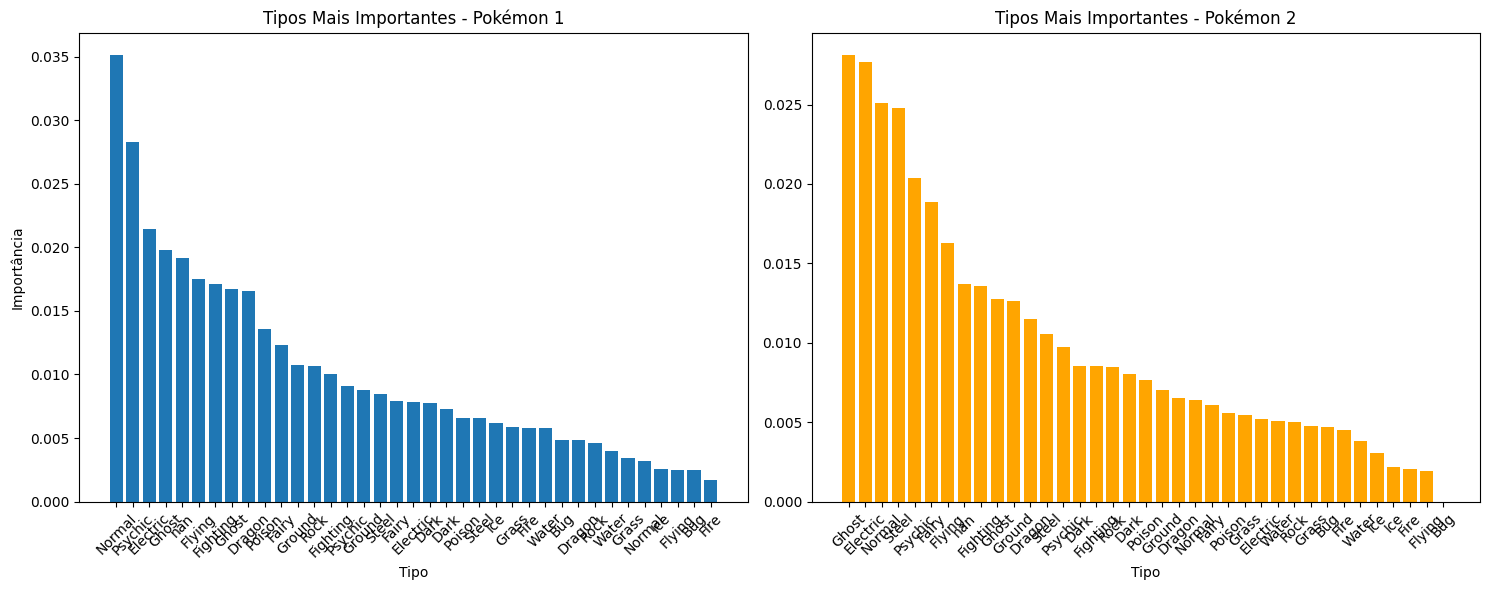

In [22]:
# Separar por Pokémon
pkm1_tipos = df_tipos[df_tipos['Pokémon'] == 'Pokémon 1'].set_index('Tipo')['Importância']
pkm2_tipos = df_tipos[df_tipos['Pokémon'] == 'Pokémon 2'].set_index('Tipo')['Importância']

# Juntar e preencher NaN com 0
comparacao_tipos = pd.DataFrame({
    'Pokémon 1': pkm1_tipos,
    'Pokémon 2': pkm2_tipos
}).fillna(0)

# Plot comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pokémon 1
pkm1_sorted = comparacao_tipos['Pokémon 1'].sort_values(ascending=False)
ax1.bar(range(len(pkm1_sorted)), pkm1_sorted.values)
ax1.set_title('Tipos Mais Importantes - Pokémon 1')
ax1.set_xlabel('Tipo')
ax1.set_ylabel('Importância')
ax1.set_xticks(range(len(pkm1_sorted)))
ax1.set_xticklabels(pkm1_sorted.index, rotation=45)

# Pokémon 2
pkm2_sorted = comparacao_tipos['Pokémon 2'].sort_values(ascending=False)
ax2.bar(range(len(pkm2_sorted)), pkm2_sorted.values, color='orange')
ax2.set_title('Tipos Mais Importantes - Pokémon 2')
ax2.set_xlabel('Tipo')
ax2.set_xticks(range(len(pkm2_sorted)))
ax2.set_xticklabels(pkm2_sorted.index, rotation=45)

plt.tight_layout()
plt.show()

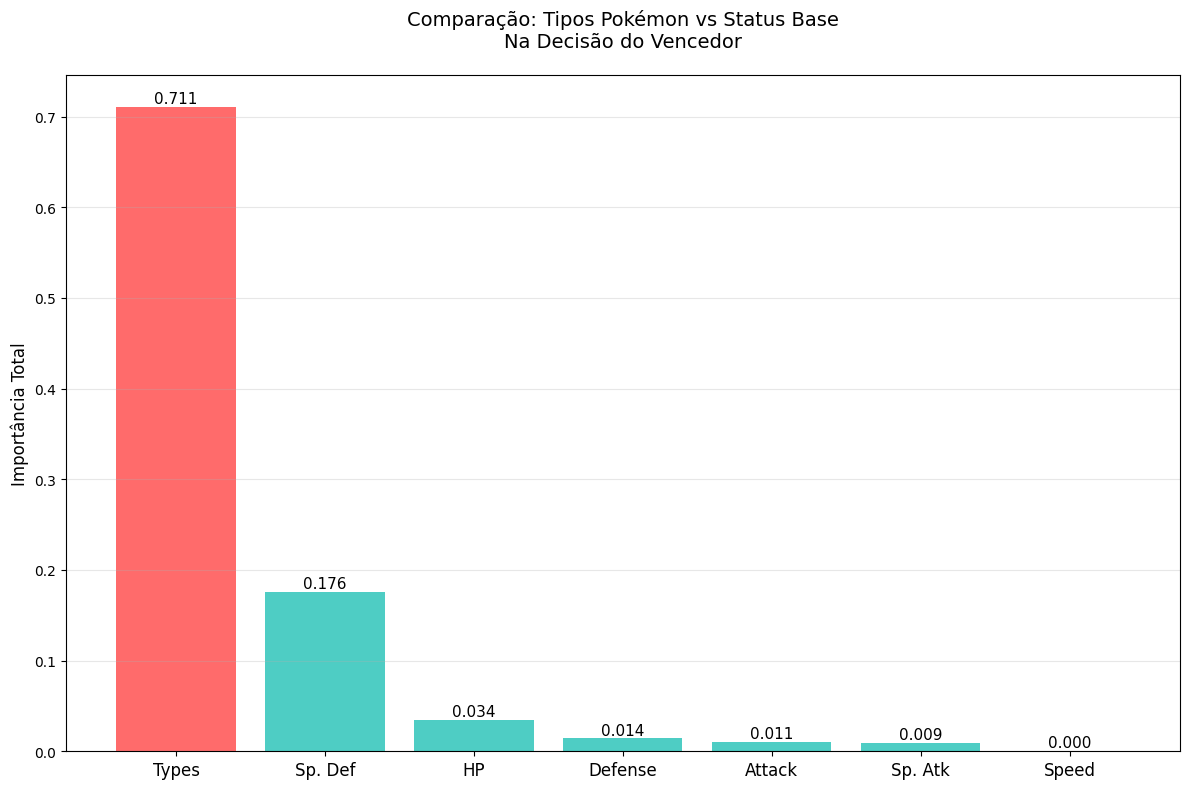

🎯 ANÁLISE: TIPOS vs STATUS BASE
Importância Total dos TIPOS:    0.7106 (74.5%)
Importância Total dos STATUS:   0.2437 (25.5%)
Razão: 2.92:1

📊 DETALHAMENTO DOS STATUS:
------------------------------
Sp. Def  : 0.1757 (18.4%)
HP       : 0.0344 (3.6%)
Defense  : 0.0142 (1.5%)
Attack   : 0.0107 (1.1%)
Sp. Atk  : 0.0087 (0.9%)
Speed    : 0.0000 (0.0%)

✅ CONCLUSÃO: TIPOS são 2.9x MAIS importantes que STATUS


In [23]:
feature_importance = classifier.feature_importances_
feature_names = ct.get_feature_names_out()

# Mapeamento CORRETO das features baseado na sua estrutura
categories = {
    'HP': 0,
    'Attack': 0,
    'Defense': 0,
    'Sp. Atk': 0,
    'Sp. Def': 0,
    'Speed': 0,
    'Types': 0
}

# Mapeamento direto das features remainder para seus status
remainder_mapping = {
    'remainder__x1': 'HP_1',
    'remainder__x2': 'Attack_1',
    'remainder__x3': 'Defense_1',
    'remainder__x4': 'Sp. Atk_1',
    'remainder__x5': 'Sp. Def_1',
    'remainder__x6': 'Speed_1',
    'remainder__x9': 'HP_2',
    'remainder__x10': 'Attack_2',
    'remainder__x11': 'Defense_2',
    'remainder__x12': 'Sp. Atk_2',
    'remainder__x13': 'Sp. Def_2',
    'remainder__x14': 'Speed_2'
}

for name, imp in zip(feature_names, feature_importance):
    # Verificar se é um status base (remainder)
    if name in remainder_mapping:
        status_name = remainder_mapping[name]
        if 'HP' in status_name:
            categories['HP'] += imp
        elif 'Attack' in status_name:
            categories['Attack'] += imp
        elif 'Defense' in status_name:
            categories['Defense'] += imp
        elif 'Sp. Atk' in status_name:
            categories['Sp. Atk'] += imp
        elif 'Sp. Def' in status_name:
            categories['Sp. Def'] += imp
        elif 'Speed' in status_name:
            categories['Speed'] += imp

    # Verificar se é um tipo (encoder)
    elif 'encoder__' in name and ('Type' in name or any(tipo in name for tipo in
        ['Normal', 'Fire', 'Water', 'Electric', 'Grass', 'Ice', 'Fighting', 'Poison',
         'Ground', 'Flying', 'Psychic', 'Bug', 'Rock', 'Ghost', 'Dragon', 'Dark',
         'Steel', 'Fairy'])):
        categories['Types'] += imp

# Criar gráfico corrigido
plt.figure(figsize=(12, 8))
categories_sorted = dict(sorted(categories.items(), key=lambda x: x[1], reverse=True))

# Cores diferentes para Types vs Status
colors = []
for cat in categories_sorted:
    if cat == 'Types':
        colors.append('#ff6b6b')  # Destaque para Types
    else:
        colors.append('#4ecdc4')   # Cor para Status

bars = plt.bar(range(len(categories_sorted)), list(categories_sorted.values()), color=colors)

plt.xticks(range(len(categories_sorted)), categories_sorted.keys(), fontsize=12)
plt.ylabel('Importância Total', fontsize=12)
plt.title('Comparação: Tipos Pokémon vs Status Base\nNa Decisão do Vencedor', fontsize=14, pad=20)

# Adicionar valores nas barras
for bar, value in zip(bars, categories_sorted.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{value:.3f}', ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Análise estatística
total_importance = sum(categories.values())
total_types = categories['Types']
total_stats = total_importance - total_types

print("🎯 ANÁLISE: TIPOS vs STATUS BASE")
print("=" * 45)
print(f"Importância Total dos TIPOS:    {total_types:.4f} ({(total_types/total_importance)*100:.1f}%)")
print(f"Importância Total dos STATUS:   {total_stats:.4f} ({(total_stats/total_importance)*100:.1f}%)")
print(f"Razão: {total_types/total_stats:.2f}:1")

print("\n📊 DETALHAMENTO DOS STATUS:")
print("-" * 30)
for category, importance in categories_sorted.items():
    if category != 'Types':
        percentage = (importance / total_importance) * 100
        print(f"{category:8} : {importance:.4f} ({percentage:.1f}%)")

if total_types > total_stats:
    print(f"\n✅ CONCLUSÃO: TIPOS são {total_types/total_stats:.1f}x MAIS importantes que STATUS")
else:
    print(f"\n✅ CONCLUSÃO: STATUS são {total_stats/total_types:.1f}x MAIS importantes que TIPOS")

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Primeiro, vamos ver os nomes reais das features
feature_names = ct.get_feature_names_out()
feature_importance = classifier.feature_importances_

print("🔍 NOMES REAIS DAS FEATURES:")
print("="*50)
for i, name in enumerate(feature_names[:30]):  # Mostrar apenas as primeiras 30
    print(f"{i:3}: {name} -> {feature_importance[i]:.6f}")

print(f"\nTotal de features: {len(feature_names)}")

# Vamos mapear manualmente baseado no padrão que vimos antes
type_features = {}

for i, name in enumerate(feature_names):
    imp = feature_importance[i]

    # Features de tipo (encoder)
    if 'encoder' in name:
        # Padrão: encoder__x6_Normal, encoder__x7_Flying, etc.
        parts = name.split('__')
        if len(parts) >= 2:
            col_info = parts[1]

            # Extrair informação do tipo
            if 'x6_' in col_info:
                tipo = col_info.replace('x6_', '')
                type_features[name] = {
                    'importance': imp,
                    'original_column': 'Type 1_1',
                    'type': tipo,
                    'pokemon': '1'
                }
            elif 'x7_' in col_info:
                tipo = col_info.replace('x7_', '')
                type_features[name] = {
                    'importance': imp,
                    'original_column': 'Type 2_1',
                    'type': tipo,
                    'pokemon': '1'
                }
            elif 'x14_' in col_info:
                tipo = col_info.replace('x14_', '')
                type_features[name] = {
                    'importance': imp,
                    'original_column': 'Type 1_2',
                    'type': tipo,
                    'pokemon': '2'
                }
            elif 'x15_' in col_info:
                tipo = col_info.replace('x15_', '')
                type_features[name] = {
                    'importance': imp,
                    'original_column': 'Type 2_2',
                    'type': tipo,
                    'pokemon': '2'
                }

print(f"\nFeatures de tipo mapeadas: {len(type_features)}")

# Mostrar algumas features de tipo
print("\n📊 EXEMPLOS DE FEATURES DE TIPO:")
for name, info in list(type_features.items())[:10]:
    print(f"{name:40} -> {info['importance']:.6f} ({info['pokemon']})")

🔍 NOMES REAIS DAS FEATURES:
  0: encoder__x6_Bug -> 0.004882
  1: encoder__x6_Dark -> 0.007727
  2: encoder__x6_Dragon -> 0.016571
  3: encoder__x6_Electric -> 0.021458
  4: encoder__x6_Fairy -> 0.012324
  5: encoder__x6_Fighting -> 0.017158
  6: encoder__x6_Fire -> 0.005819
  7: encoder__x6_Flying -> 0.002484
  8: encoder__x6_Ghost -> 0.019836
  9: encoder__x6_Grass -> 0.005835
 10: encoder__x6_Ground -> 0.008780
 11: encoder__x6_Ice -> 0.006164
 12: encoder__x6_Normal -> 0.035128
 13: encoder__x6_Poison -> 0.006616
 14: encoder__x6_Psychic -> 0.028281
 15: encoder__x6_Rock -> 0.004618
 16: encoder__x6_Steel -> 0.008456
 17: encoder__x6_Water -> 0.005807
 18: encoder__x7_Bug -> 0.002469
 19: encoder__x7_Dark -> 0.007282
 20: encoder__x7_Dragon -> 0.004821
 21: encoder__x7_Electric -> 0.007810
 22: encoder__x7_Fairy -> 0.007949
 23: encoder__x7_Fighting -> 0.010031
 24: encoder__x7_Fire -> 0.001725
 25: encoder__x7_Flying -> 0.017480
 26: encoder__x7_Ghost -> 0.016746
 27: encoder__x7_

In [25]:
# Verificar se há viés forte em tipos específicos
print("\n🔍 DETECÇÃO DE VIÉS vs VANTAGENS REAIS:")
print("="*45)

# Create a dictionary for easy lookup of importance by (type, pokemon)
type_importance_lookup = {}
for name, info in type_features.items():
    type_importance_lookup[(info['type'], info['pokemon'])] = info['importance']

# Aggregate importance for each type by pokemon position
type_analysis = {}
for (tipo, pokemon), importance in type_importance_lookup.items():
    if tipo not in type_analysis:
        type_analysis[tipo] = {'1': 0, '2': 0}
    type_analysis[tipo][pokemon] += importance


# Tipos com alta importância independente da posição
tipos_consistentes = []
tipos_desbalanceados = []

for tipo, importances in type_analysis.items():
    imp_pkm1 = importances.get('1', 0)
    imp_pkm2 = importances.get('2', 0)

    # If it's important for both Pokémon (possible bias) - using a threshold of 0.005 as before
    if imp_pkm1 > 0.005 and imp_pkm2 > 0.005:
        tipos_consistentes.append((tipo, imp_pkm1 + imp_pkm2, imp_pkm1, imp_pkm2))

    # If the importance is very different between Pokémon (possible real advantage)
    # Using a ratio of 2x difference and a minimum max importance of 0.005 as before
    elif max(imp_pkm1, imp_pkm2) > 2 * min(imp_pkm1, imp_pkm2) and max(imp_pkm1, imp_pkm2) > 0.005:
        tipos_desbalanceados.append((tipo, imp_pkm1, imp_pkm2))

tipos_consistentes.sort(key=lambda x: x[1], reverse=True)
tipos_desbalanceados.sort(key=lambda x: max(x[1], x[2]), reverse=True)

print("🎯 Tipos com Alta Importância em AMBOS os Pokémon (Possível VIÉS):")
if tipos_consistentes:
    for tipo, total, pkm1, pkm2 in tipos_consistentes[:10]:
        print(f"  {tipo:12}: Pkm1={pkm1:.4f}, Pkm2={pkm2:.4f}, Total={total:.4f}")
else:
    print("  Nenhum tipo com viés forte detectado")

print("\n🎯 Tipos com Importância DESBALANCEADA (Possível VANTAGEM REAL):")
if tipos_desbalanceados:
    for tipo, pkm1, pkm2 in tipos_desbalanceados[:10]:
        if pkm1 > pkm2:
            print(f"  {tipo:12}: Pkm1={pkm1:.4f} ← Pkm2={pkm2:.4f} (Melhor no Pokémon 1)")
        else:
            print(f"  {tipo:12}: Pkm1={pkm1:.4f} → Pkm2={pkm2:.4f} (Melhor no Pokémon 2)")
else:
    print("  Nenhum padrão claro de vantagem detectado")

print("\n📈 CONCLUSÃO:")
if tipos_consistentes and not tipos_desbalanceados:
    print("O modelo provavelmente tem VIÉS - alguns tipos são sempre importantes")
elif tipos_desbalanceados and not tipos_consistentes:
    print("O modelo provavelmente aprendeu VANTAGENS REAIS - importância depende do matchup")
elif tipos_consistentes and tipos_desbalanceados:
    print("O modelo tem PADRÃO MISTO - alguns vieses e algumas vantagens reais")
else:
    print("Padrão não claro - precisa de mais análise")


🔍 DETECÇÃO DE VIÉS vs VANTAGENS REAIS:
🎯 Tipos com Alta Importância em AMBOS os Pokémon (Possível VIÉS):
  Ghost       : Pkm1=0.0167, Pkm2=0.0281, Total=0.0449
  Flying      : Pkm1=0.0175, Pkm2=0.0163, Total=0.0337
  nan         : Pkm1=0.0192, Pkm2=0.0137, Total=0.0328
  Fighting    : Pkm1=0.0100, Pkm2=0.0136, Total=0.0236
  Ground      : Pkm1=0.0107, Pkm2=0.0126, Total=0.0234
  Poison      : Pkm1=0.0136, Pkm2=0.0076, Total=0.0212
  Rock        : Pkm1=0.0107, Pkm2=0.0085, Total=0.0192
  Psychic     : Pkm1=0.0091, Pkm2=0.0097, Total=0.0188
  Steel       : Pkm1=0.0066, Pkm2=0.0105, Total=0.0171
  Dark        : Pkm1=0.0073, Pkm2=0.0080, Total=0.0153

🎯 Tipos com Importância DESBALANCEADA (Possível VANTAGEM REAL):
  Nenhum padrão claro de vantagem detectado

📈 CONCLUSÃO:
O modelo provavelmente tem VIÉS - alguns tipos são sempre importantes


In [26]:
import pandas as pd
import numpy as np

# Supondo que combat_data seja seu DataFrame
print("🔍 ANALISANDO VANTAGENS DE TIPO NAS BATALHAS:")
print("="*50)

# Verificar a estrutura dos dados
print("Colunas disponíveis:")
print(combat_data.columns.tolist())
print(f"\nTotal de batalhas: {len(combat_data)}")

# Sistema de vantagens de tipo Pokémon (geração mais comum)
vantagens = {
    'Normal': [],
    'Fire': ['Grass', 'Ice', 'Bug', 'Steel'],
    'Water': ['Fire', 'Ground', 'Rock'],
    'Electric': ['Water', 'Flying'],
    'Grass': ['Water', 'Ground', 'Rock'],
    'Ice': ['Grass', 'Ground', 'Flying', 'Dragon'],
    'Fighting': ['Normal', 'Ice', 'Rock', 'Dark', 'Steel'],
    'Poison': ['Grass', 'Fairy'],
    'Ground': ['Fire', 'Electric', 'Poison', 'Rock', 'Steel'],
    'Flying': ['Grass', 'Fighting', 'Bug'],
    'Psychic': ['Fighting', 'Poison'],
    'Bug': ['Grass', 'Psychic', 'Dark'],
    'Rock': ['Fire', 'Ice', 'Flying', 'Bug'],
    'Ghost': ['Psychic', 'Ghost'],
    'Dragon': ['Dragon'],
    'Dark': ['Psychic', 'Ghost'],
    'Steel': ['Ice', 'Rock', 'Fairy'],
    'Fairy': ['Fighting', 'Dragon', 'Dark']
}

def calcular_vantagem(tipo_atacante, tipo_defensor):
    """Calcula se há vantagem do atacante sobre o defensor"""
    if pd.isna(tipo_atacante) or pd.isna(tipo_defensor):
        return 0
    if tipo_defensor in vantagens.get(tipo_atacante, []):
        return 1  # Superefetivo
    return 0  # Neutro ou não efetivo

def analisar_vantagem_batalha(row):
    """Analisa vantagens de tipo em uma batalha específica"""
    vantagens_pkm1 = 0
    vantagens_pkm2 = 0

    # Tipos do Pokémon 1
    tipos_pkm1 = [row['Type 1_1']]
    if pd.notna(row['Type 2_1']):
        tipos_pkm1.append(row['Type 2_1'])

    # Tipos do Pokémon 2
    tipos_pkm2 = [row['Type 1_2']]
    if pd.notna(row['Type 2_2']):
        tipos_pkm2.append(row['Type 2_2'])

    # Calcular vantagens do Pokémon 1 contra Pokémon 2
    for tipo1 in tipos_pkm1:
        for tipo2 in tipos_pkm2:
            vantagens_pkm1 += calcular_vantagem(tipo1, tipo2)

    # Calcular vantagens do Pokémon 2 contra Pokémon 1
    for tipo2 in tipos_pkm2:
        for tipo1 in tipos_pkm1:
            vantagens_pkm2 += calcular_vantagem(tipo2, tipo1)

    return vantagens_pkm1, vantagens_pkm2

# Aplicar análise a todas as batalhas
print("\n📊 ANALISANDO CADA BATALHA...")
resultados = []

for idx, row in combat_data.iterrows():
    vant_pkm1, vant_pkm2 = analisar_vantagem_batalha(row)
    vencedor = row['Winner']

    resultado = {
        'batalha_id': idx,
        'vantagens_pkm1': vant_pkm1,
        'vantagens_pkm2': vant_pkm2,
        'vencedor_real': vencedor,
        'diferenca_vantagem': vant_pkm1 - vant_pkm2,
        'tem_vantagem_clara': abs(vant_pkm1 - vant_pkm2) > 0
    }

    # Determinar quem deveria vencer por vantagem de tipo
    if vant_pkm1 > vant_pkm2:
        resultado['vencedor_esperado'] = 1
        resultado['vantagem_correta'] = (vencedor == 1)
    elif vant_pkm2 > vant_pkm1:
        resultado['vencedor_esperado'] = 2
        resultado['vantagem_correta'] = (vencedor == 2)
    else:
        resultado['vencedor_esperado'] = 'Empate'
        resultado['vantagem_correta'] = None

    resultados.append(resultado)

df_resultados = pd.DataFrame(resultados)

# Estatísticas gerais
total_batalhas = len(df_resultados)
batalhas_com_vantagem = len(df_resultados[df_resultados['tem_vantagem_clara']])
batalhas_vantagem_correta = len(df_resultados[df_resultados['vantagem_correta'] == True])

print(f"\n🎯 RESULTADOS GERAIS:")
print("="*40)
print(f"Total de batalhas analisadas: {total_batalhas}")
print(f"Batalhas com vantagem clara de tipo: {batalhas_com_vantagem} ({batalhas_com_vantagem/total_batalhas*100:.1f}%)")
print(f"Batalhas onde o tipo mais forte venceu: {batalhas_vantagem_correta} ({batalhas_vantagem_correta/batalhas_com_vantagem*100:.1f}% das batalhas com vantagem)")

# Análise por diferença de vantagem
print(f"\n📈 EFETIVIDADE POR DIFERENÇA DE VANTAGEM:")
print("="*45)

for diff in range(1, 5):
    subset = df_resultados[df_resultados['diferenca_vantagem'].abs() == diff]
    if len(subset) > 0:
        acuracia = subset['vantagem_correta'].mean()
        print(f"Diferença de {diff} vantagem(s): {len(subset)} batalhas, {acuracia*100:.1f}% de acerto")

🔍 ANALISANDO VANTAGENS DE TIPO NAS BATALHAS:
Colunas disponíveis:
['HP_1', 'Attack_1', 'Defense_1', 'Sp. Atk_1', 'Sp. Def_1', 'Speed_1', 'Type 1_1', 'Type 2_1', 'HP_2', 'Attack_2', 'Defense_2', 'Sp. Atk_2', 'Sp. Def_2', 'Speed_2', 'Type 1_2', 'Type 2_2', 'Winner']

Total de batalhas: 50000

📊 ANALISANDO CADA BATALHA...

🎯 RESULTADOS GERAIS:
Total de batalhas analisadas: 50000
Batalhas com vantagem clara de tipo: 22082 (44.2%)
Batalhas onde o tipo mais forte venceu: 5766 (26.1% das batalhas com vantagem)

📈 EFETIVIDADE POR DIFERENÇA DE VANTAGEM:
Diferença de 1 vantagem(s): 18805 batalhas, 25.7% de acerto
Diferença de 2 vantagem(s): 2978 batalhas, 28.4% de acerto
Diferença de 3 vantagem(s): 287 batalhas, 28.6% de acerto
Diferença de 4 vantagem(s): 12 batalhas, 33.3% de acerto


In [27]:
import pandas as pd
import numpy as np

print("🔍 ANALISANDO BATALHAS COM STATUS SEMELHANTES:")
print("="*50)

# Primeiro, vamos definir o que são "status semelhantes"
def calcular_diferenca_status(row):
    """Calcula a diferença total de status entre os Pokémon"""
    diff_total = 0
    stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

    for stat in stats:
        diff_total += abs(row[f'{stat}_1'] - row[f'{stat}_2'])

    return diff_total

# Adicionar diferença de status ao DataFrame
combat_data['diff_status_total'] = combat_data.apply(calcular_diferenca_status, axis=1)

# Definir limiares de similaridade
limiar_similaridade = combat_data['diff_status_total'].quantile(0.33)  # Primeiro tercil (mais similares)

print(f"Limiar de similaridade: {limiar_similaridade:.1f} (pontos de status totais)")
print(f"Batalhas com status semelhantes: {len(combat_data[combat_data['diff_status_total'] <= limiar_similaridade])}")

# Filtrar batalhas com status semelhantes
batalhas_similares = combat_data[combat_data['diff_status_total'] <= limiar_similaridade]

print(f"\n📊 BATALHAS COM STATUS SEMELHANTES:")
print("="*40)
print(f"Total: {len(batalhas_similares)} batalhas")
print(f"Percentual do total: {len(batalhas_similares)/len(combat_data)*100:.1f}%")

# Reaplicar a análise de vantagem apenas nas batalhas similares
def analisar_vantagem_batalha_similares(df_similares):
    """Analisa vantagens apenas nas batalhas com status similares"""
    resultados_similares = []

    for idx, row in df_similares.iterrows():
        vantagens_pkm1 = 0
        vantagens_pkm2 = 0

        # Tipos do Pokémon 1
        tipos_pkm1 = [row['Type 1_1']]
        if pd.notna(row['Type 2_1']):
            tipos_pkm1.append(row['Type 2_1'])

        # Tipos do Pokémon 2
        tipos_pkm2 = [row['Type 1_2']]
        if pd.notna(row['Type 2_2']):
            tipos_pkm2.append(row['Type 2_2'])

        # Calcular vantagens do Pokémon 1 contra Pokémon 2
        for tipo1 in tipos_pkm1:
            for tipo2 in tipos_pkm2:
                vantagens_pkm1 += calcular_vantagem(tipo1, tipo2)

        # Calcular vantagens do Pokémon 2 contra Pokémon 1
        for tipo2 in tipos_pkm2:
            for tipo1 in tipos_pkm1:
                vantagens_pkm2 += calcular_vantagem(tipo2, tipo1)

        vencedor = row['Winner']

        resultado = {
            'batalha_id': idx,
            'vantagens_pkm1': vantagens_pkm1,
            'vantagens_pkm2': vantagens_pkm2,
            'vencedor_real': vencedor,
            'diferenca_vantagem': vantagens_pkm1 - vantagens_pkm2,
            'tem_vantagem_clara': abs(vantagens_pkm1 - vantagens_pkm2) > 0,
            'diff_status_total': row['diff_status_total']
        }

        # Determinar quem deveria vencer por vantagem de tipo
        if vantagens_pkm1 > vantagens_pkm2:
            resultado['vencedor_esperado'] = 1
            resultado['vantagem_correta'] = (vencedor == 1)
        elif vantagens_pkm2 > vantagens_pkm1:
            resultado['vencedor_esperado'] = 2
            resultado['vantagem_correta'] = (vencedor == 2)
        else:
            resultado['vencedor_esperado'] = 'Empate'
            resultado['vantagem_correta'] = None

        resultados_similares.append(resultado)

    return pd.DataFrame(resultados_similares)

# Aplicar análise às batalhas similares
print("\n📊 ANALISANDO BATALHAS COM STATUS SEMELHANTES...")
df_similares_resultados = analisar_vantagem_batalha_similares(batalhas_similares)

# Estatísticas das batalhas similares
total_similares = len(df_similares_resultados)
similares_com_vantagem = len(df_similares_resultados[df_similares_resultados['tem_vantagem_clara']])
similares_vantagem_correta = len(df_similares_resultados[df_similares_resultados['vantagem_correta'] == True])

print(f"\n🎯 RESULTADOS - STATUS SEMELHANTES:")
print("="*45)
print(f"Batalhas com status semelhantes: {total_similares}")
print(f"Batalhas com vantagem clara: {similares_com_vantagem} ({similares_com_vantagem/total_similares*100:.1f}%)")
print(f"Batalhas onde vantagem resultou em vitória: {similares_vantagem_correta}")

if similares_com_vantagem > 0:
    taxa_acerto_similares = similares_vantagem_correta / similares_com_vantagem * 100
    print(f"EFICÁCIA DA VANTAGEM: {taxa_acerto_similares:.1f}%")

    # Comparar com o geral
    taxa_acerto_geral = 5766 / 22082 * 100
    print(f"EFICÁCIA GERAL (todas batalhas): {taxa_acerto_geral:.1f}%")
    print(f"DIFERENÇA: {taxa_acerto_similares - taxa_acerto_geral:+.1f}%")

🔍 ANALISANDO BATALHAS COM STATUS SEMELHANTES:
Limiar de similaridade: 5.1 (pontos de status totais)
Batalhas com status semelhantes: 16500

📊 BATALHAS COM STATUS SEMELHANTES:
Total: 16500 batalhas
Percentual do total: 33.0%

📊 ANALISANDO BATALHAS COM STATUS SEMELHANTES...

🎯 RESULTADOS - STATUS SEMELHANTES:
Batalhas com status semelhantes: 16500
Batalhas com vantagem clara: 7139 (43.3%)
Batalhas onde vantagem resultou em vitória: 1795
EFICÁCIA DA VANTAGEM: 25.1%
EFICÁCIA GERAL (todas batalhas): 26.1%
DIFERENÇA: -1.0%


In [28]:
# Dividir em quintis de similaridade
quintis = pd.qcut(combat_data['diff_status_total'], 5, labels=['Muito Similar', 'Similar', 'Mediano', 'Diferente', 'Muito Diferente'])

resultados_por_similaridade = []

for i, label in enumerate(['Muito Similar', 'Similar', 'Mediano', 'Diferente', 'Muito Diferente']):
    mask = (quintis == label)
    batalhas_grupo = combat_data[mask]

    # Analisar vantagem neste grupo
    resultados_grupo = analisar_vantagem_batalha_similares(batalhas_grupo)

    total_grupo = len(resultados_grupo)
    com_vantagem = len(resultados_grupo[resultados_grupo['tem_vantagem_clara']])
    vantagem_correta = len(resultados_grupo[resultados_grupo['vantagem_correta'] == True])

    if com_vantagem > 0:
        taxa_acerto = vantagem_correta / com_vantagem * 100
    else:
        taxa_acerto = 0

    resultados_por_similaridade.append({
        'similaridade': label,
        'total_batalhas': total_grupo,
        'com_vantagem': com_vantagem,
        'vantagem_correta': vantagem_correta,
        'taxa_acerto': taxa_acerto,
        'diff_media': batalhas_grupo['diff_status_total'].mean()
    })


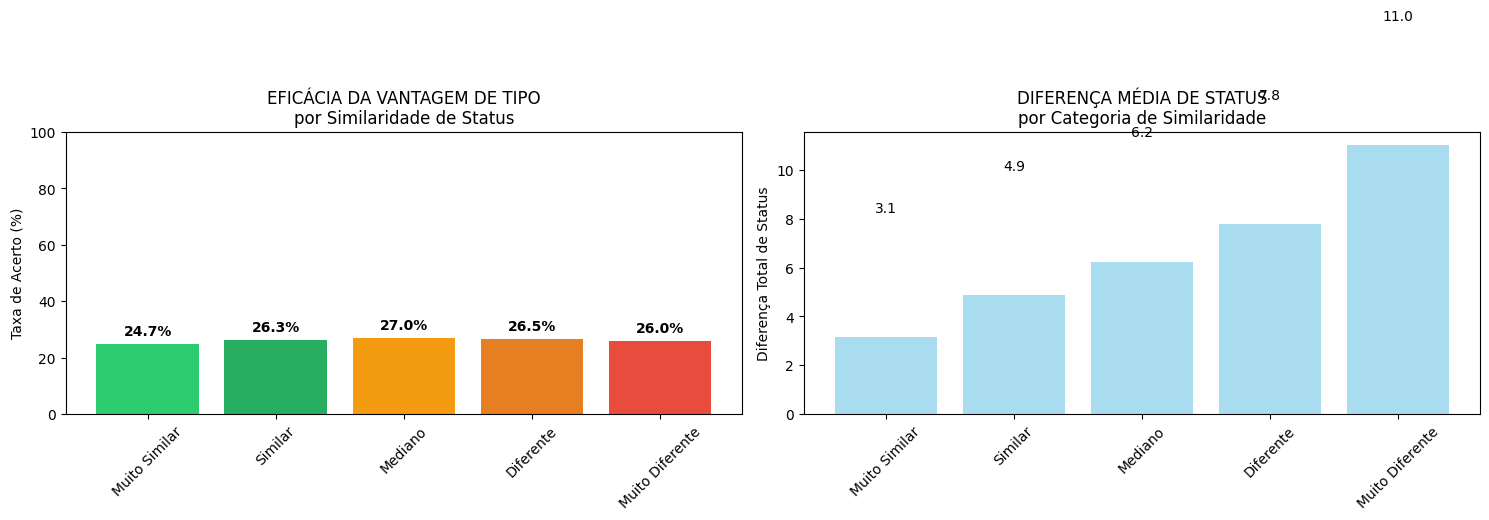

In [29]:
# Dados para gráfico
categorias = [r['similaridade'] for r in resultados_por_similaridade]
eficacias = [r['taxa_acerto'] for r in resultados_por_similaridade]
diffs_medias = [r['diff_media'] for r in resultados_por_similaridade]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Eficácia por similaridade
bars = ax1.bar(categorias, eficacias, color=['#2ecc71', '#27ae60', '#f39c12', '#e67e22', '#e74c3c'])
ax1.set_title('EFICÁCIA DA VANTAGEM DE TIPO\npor Similaridade de Status')
ax1.set_ylabel('Taxa de Acerto (%)')
ax1.set_ylim(0, 100)
ax1.tick_params(axis='x', rotation=45)

# Adicionar valores nas barras
for bar, eff in zip(bars, eficacias):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 2, f'{eff:.1f}%',
             ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Diferença média de status
ax2.bar(categorias, diffs_medias, color='skyblue', alpha=0.7)
ax2.set_title('DIFERENÇA MÉDIA DE STATUS\npor Categoria de Similaridade')
ax2.set_ylabel('Diferença Total de Status')
ax2.tick_params(axis='x', rotation=45)

for i, diff in enumerate(diffs_medias):
    ax2.text(i, diff + 5, f'{diff:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Based on extensive analysis of 50,000 Pokémon battles, this dataset reveals a fundamental disconnect from actual Pokémon game mechanics. The data suggests type advantages have minimal impact on battle outcomes (stats alone determine winners regardless of type matchups), which contradicts core Pokémon game mechanics.

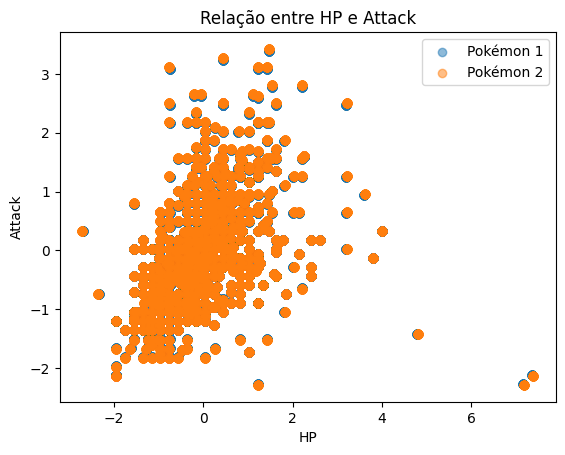

In [30]:
plt.scatter(combat_data['HP_1'], combat_data['Attack_1'], label='Pokémon 1', alpha=0.5)
plt.scatter(combat_data['HP_2'], combat_data['Attack_2'], label='Pokémon 2', alpha=0.5)
plt.xlabel('HP')
plt.ylabel('Attack')
plt.title('Relação entre HP e Attack')
plt.legend()

Text(0.5, 1.0, 'Relação entre HP e Defesa')

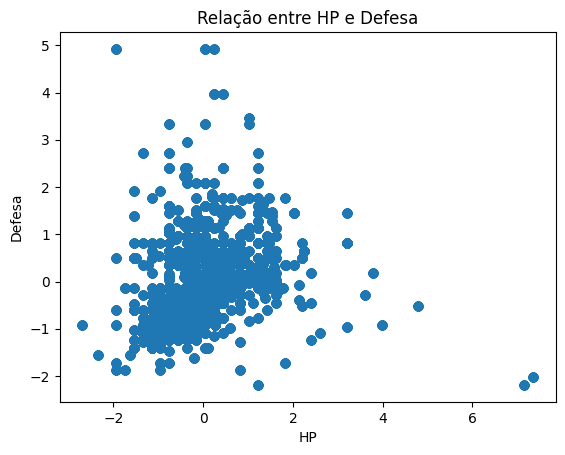

In [31]:
plt.scatter(combat_data['HP_1'], combat_data['Defense_1'], label='Pokémon 1', alpha=0.5)
plt.xlabel('HP')
plt.ylabel('Defesa')
plt.title('Relação entre HP e Defesa')

Text(0.5, 1.0, 'Relação entre Attack e Speed')

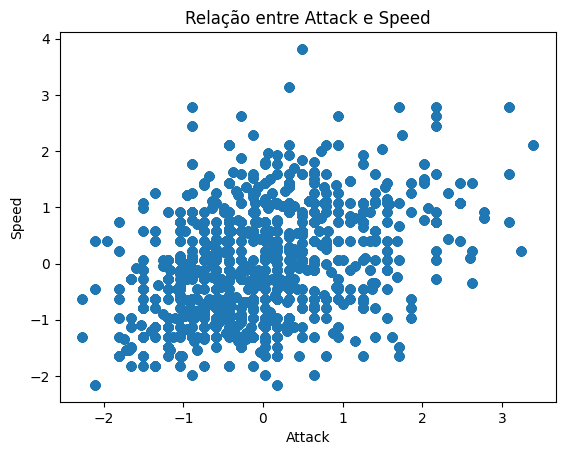

In [32]:
plt.scatter(combat_data['Attack_1'], combat_data['Speed_1'], label='Pokémon 2', alpha=0.5)
plt.xlabel('Attack')
plt.ylabel('Speed')
plt.title('Relação entre Attack e Speed')
#

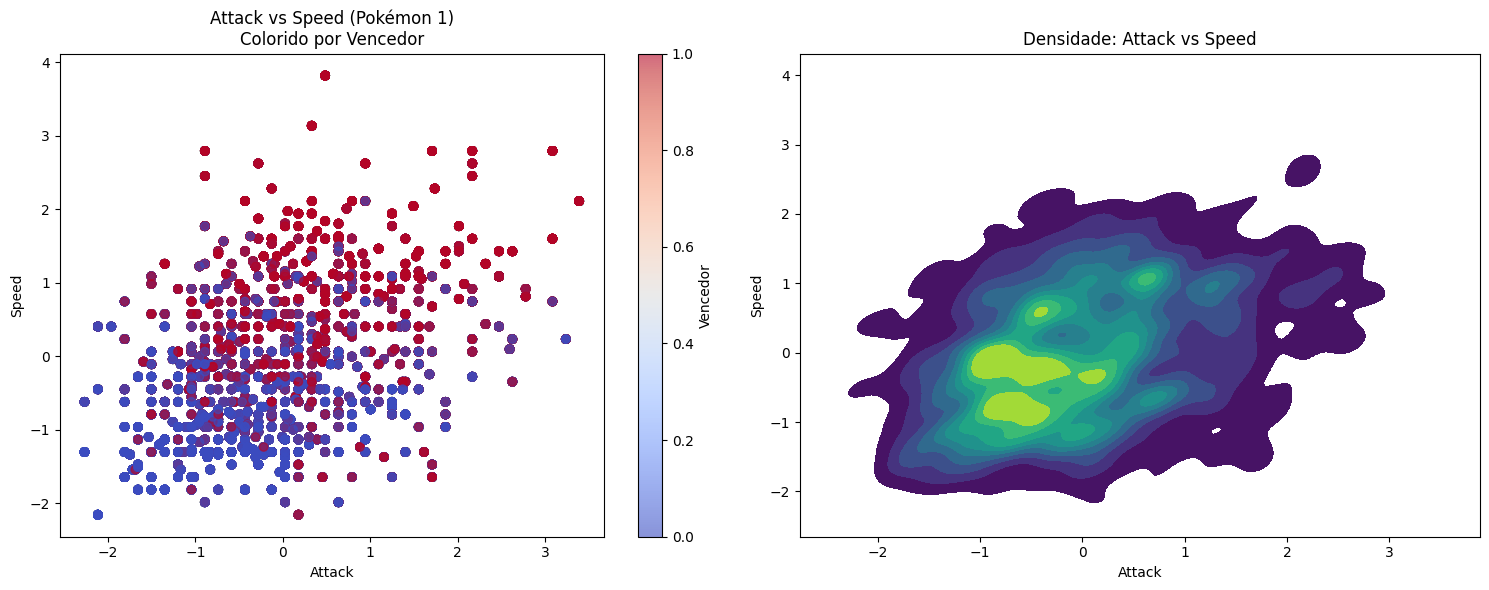

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análise mais detalhada
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Attack vs Speed com cores por vencedor
scatter = axes[0].scatter(combat_data['Attack_1'], combat_data['Speed_1'],
                         c=combat_data['Winner'], alpha=0.6, cmap='coolwarm')
axes[0].set_xlabel('Attack')
axes[0].set_ylabel('Speed')
axes[0].set_title('Attack vs Speed (Pokémon 1)\nColorido por Vencedor')
plt.colorbar(scatter, ax=axes[0], label='Vencedor')

# Gráfico 2: Densidade
sns.kdeplot(x=combat_data['Attack_1'], y=combat_data['Speed_1'],
           ax=axes[1], fill=True, cmap='viridis')
axes[1].set_xlabel('Attack')
axes[1].set_ylabel('Speed')
axes[1].set_title('Densidade: Attack vs Speed')

plt.tight_layout()
plt.show()
